# **Supervised Algorithms**  

This notebook demonstrates three fundamental machine learning algorithms:  

1. Linear Regression  
2. Logistic Regression  
3. Decision Trees  

We'll use popular Python libraries like **scikit-learn**, **numpy**, and **matplotlib** to explore these algorithms.

In [71]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report,r2_score 

## 1. Linear Regression

Linear Regression is used to predict a continuous output based on input features. It finds the best linear relationship between inputs and outputs by minimizing the squared differences between predicted and actual values.

In [2]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

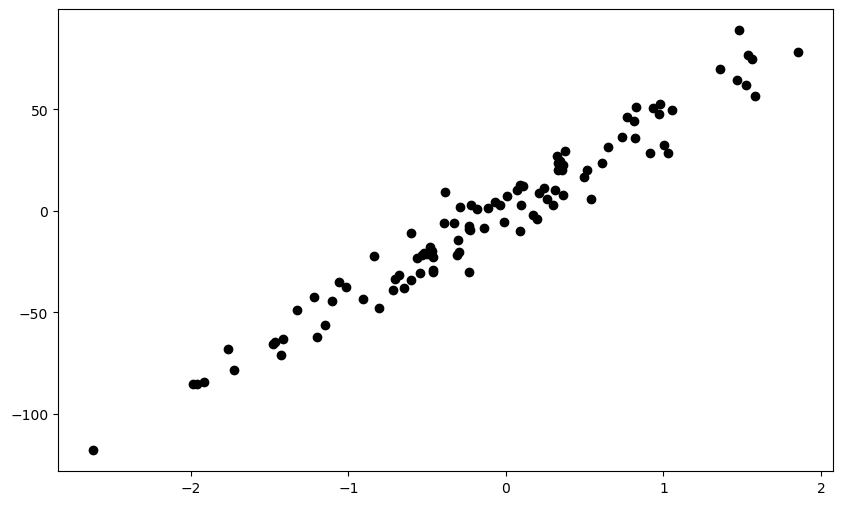

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.show()

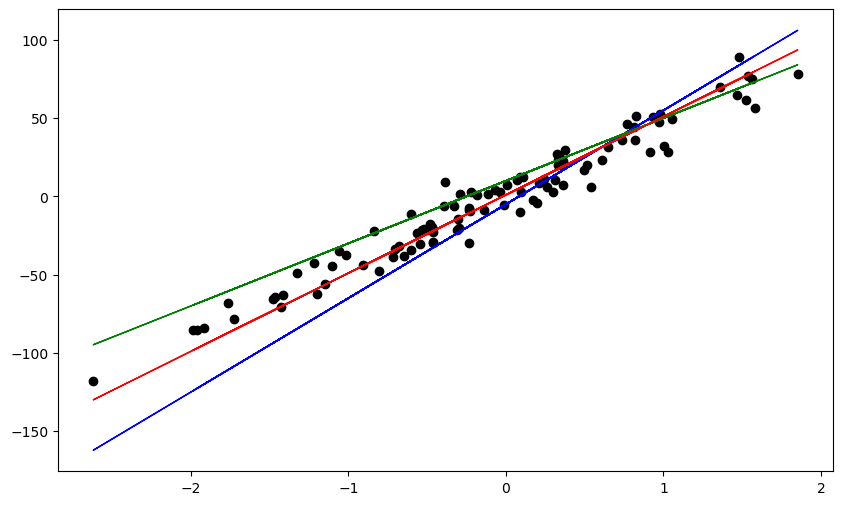

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, 60 * X - 5, color='blue', linewidth=1)
plt.plot(X, 40 * X + 10, color='green', linewidth=1)
plt.plot(X, 50 * X + 1, color='red', linewidth=1)
plt.show()

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
len(X_train), len(X_test)

(80, 20)

In [13]:
len(y_train), len(y_test)

(80, 20)

In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 104.20


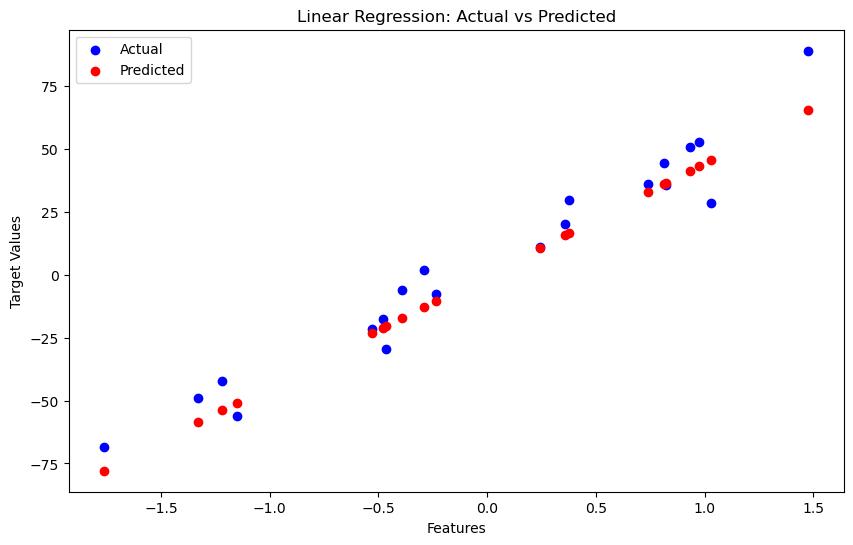

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Features')
plt.ylabel('Target Values')
plt.legend()
plt.show()

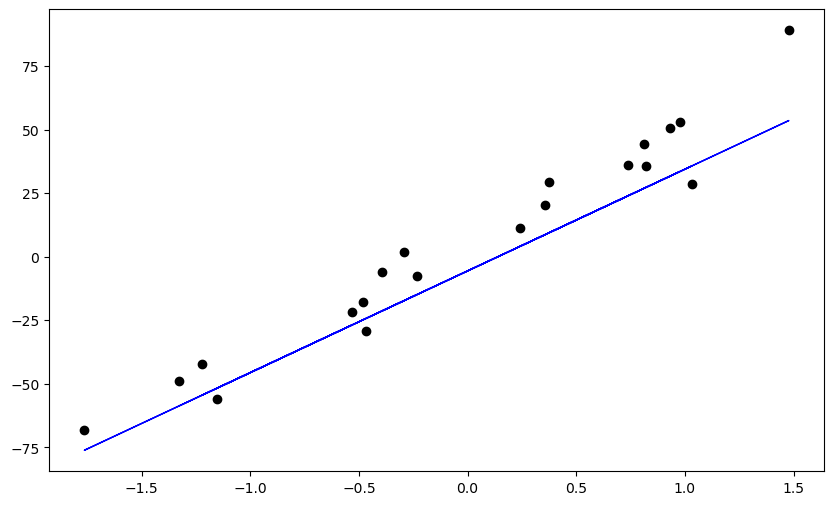

In [18]:
# Get the coefficients
slope = lr_model.coef_[0]  # Coefficient (b0)
intercept = lr_model.intercept_  # Intercept (b1)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, slope * X_test + intercept, color='blue', linewidth=1)
plt.show()

In [19]:
slope, intercept

(40.0109184774453, -5.59298838409338)

# 2. Logistic Regression

Logistic Regression is used for binary classification problems. Despite its name, it's a classification algorithm that uses the logistic function to predict probability of an instance belonging to a particular class.

In [20]:
# Generate synthetic classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [24]:
X[:, 1]

array([-1.40824123e+00, -1.45984815e+00, -1.44763291e+00,  9.63532238e-01,
        4.40695372e-01,  8.49752970e-01, -1.56005160e-01,  5.43282487e-01,
        4.93409195e-01,  2.41426917e-01, -4.30645568e-01, -1.71348441e+00,
        2.52602241e-01,  4.93854713e-02,  1.53557656e+00,  2.23297154e+00,
       -2.18236826e+00,  4.47236811e-01, -7.52371616e-01, -1.51455024e+00,
       -2.07252229e-01,  7.58449497e-01, -1.94994197e+00,  9.89269810e-01,
       -5.07833439e-01, -8.28167340e-01, -8.20860843e-01,  1.87708853e+00,
       -1.09338272e+00, -1.90223067e+00, -4.28791581e-01,  3.97127772e+00,
       -1.13725328e+00,  3.65302119e-01, -5.69372542e-02,  2.79373802e+00,
       -2.54092464e+00, -2.22710643e+00,  2.87621654e-01,  1.72758068e+00,
       -1.36514554e+00, -7.76185981e-01,  7.03133161e-01, -8.44357581e-03,
       -1.92198581e+00, -1.00567437e+00,  2.49809466e-01,  1.36113630e+00,
       -1.09011069e+00, -5.08897418e-01,  1.86412811e-01,  1.30262010e+00,
       -1.43772709e+00, -

In [22]:
y

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0])

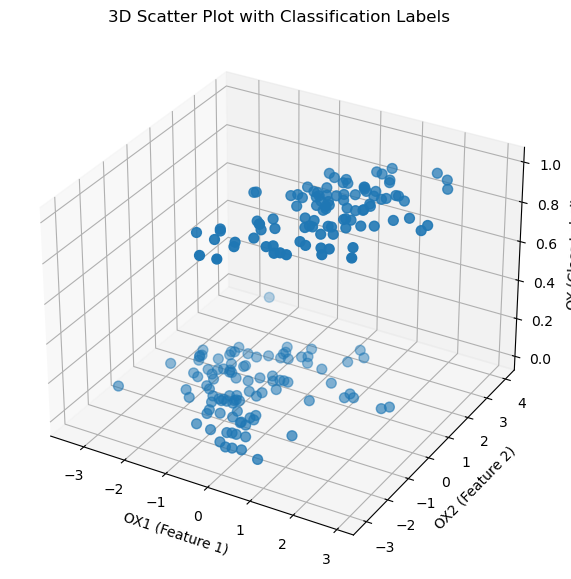

In [25]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with class-based coloring
ax.scatter(X[:, 0], X[:, 1], y, s=50)

# Labels and title
ax.set_xlabel("OX1 (Feature 1)")
ax.set_ylabel("OX2 (Feature 2)")
ax.set_zlabel("OY (Class Label)")
ax.set_title("3D Scatter Plot with Classification Labels")

plt.show()

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
min(X_train[:, 0]), max(X_train[:, 0])

(-3.365582304231961, 2.9172517291252813)

In [33]:
min(X_train_scaled[:, 0]), max(X_train_scaled[:, 0])

(-2.5315846224711676, 2.2121724519326857)

In [34]:
# Train logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [35]:
# Predict and evaluate
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,  y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



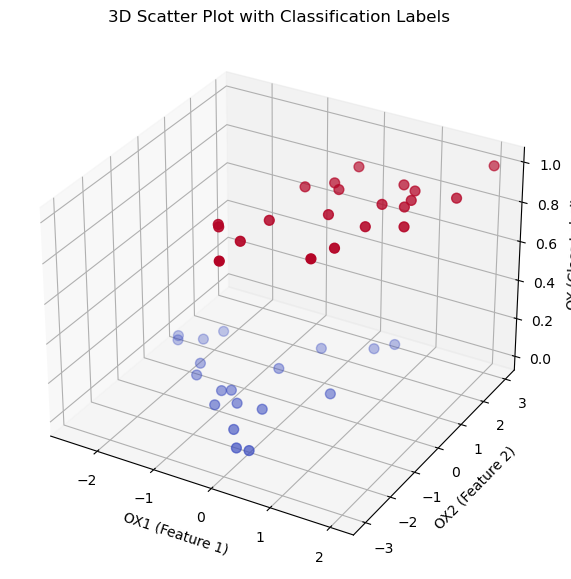

In [36]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with class-based coloring
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, s=50, c=y_test, cmap='coolwarm')

# Labels and title
ax.set_xlabel("OX1 (Feature 1)")
ax.set_ylabel("OX2 (Feature 2)")
ax.set_zlabel("OY (Class Label)")
ax.set_title("3D Scatter Plot with Classification Labels")

plt.show()

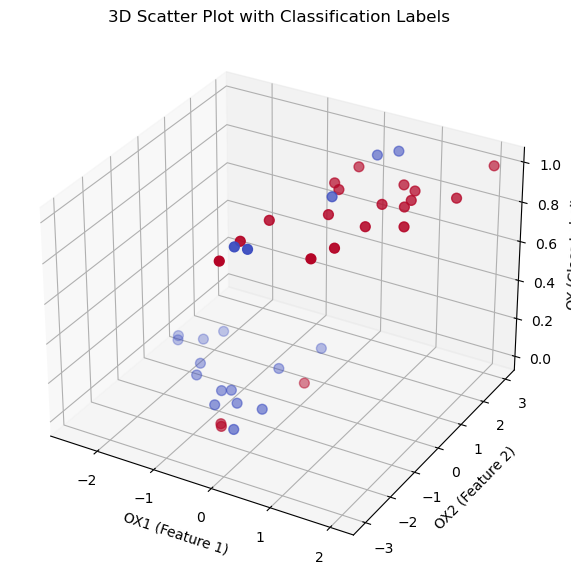

In [37]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with class-based coloring
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, s=50, c=y_test, cmap='coolwarm')

# Labels and title
ax.set_xlabel("OX1 (Feature 1)")
ax.set_ylabel("OX2 (Feature 2)")
ax.set_zlabel("OY (Class Label)")
ax.set_title("3D Scatter Plot with Classification Labels")

plt.show()

# 3. Decision Trees

Decision Trees are versatile machine learning algorithms that can be used for both classification and regression. They work by creating a tree-like model of decisions based on feature values, making them highly interpretable.

## Iris Species Classification

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

In [39]:
# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [42]:
len(X), len(y)

(150, 150)

In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [54]:
# Train decision tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
# Predict and evaluate
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
parameters = [1,2,3,4,5]

In [53]:
for parameter in parameters:
    tree_model = DecisionTreeClassifier(max_depth=parameter, random_state=42)
    tree_model.fit(X_train, y_train)
    
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f} for parameter: {parameter}")

Accuracy: 0.63 for parameter: 1
Accuracy: 0.97 for parameter: 2
Accuracy: 1.00 for parameter: 3
Accuracy: 1.00 for parameter: 4
Accuracy: 1.00 for parameter: 5


In [57]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

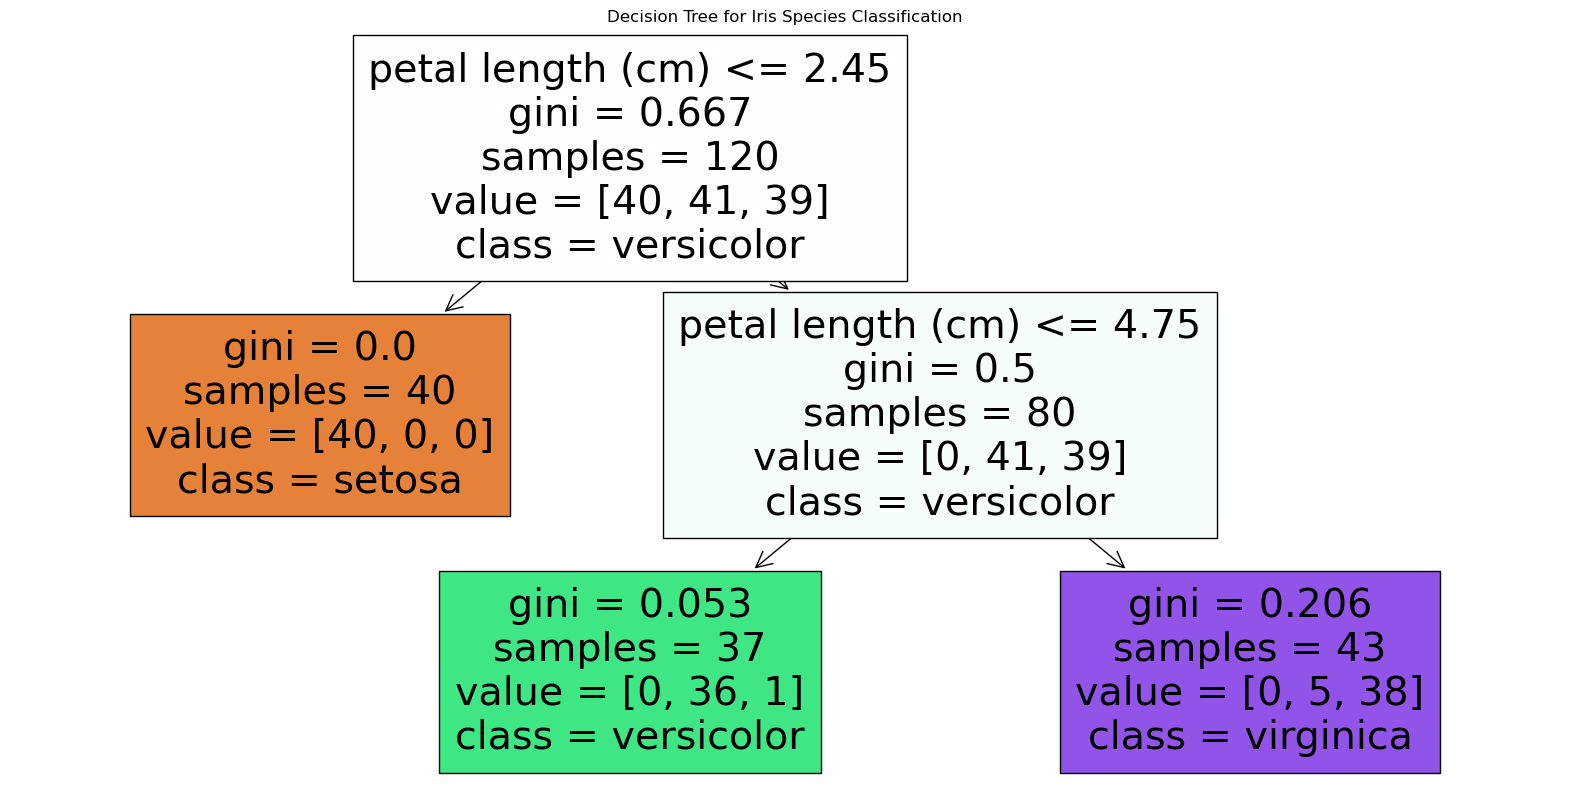

In [50]:
# Visualization of Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree for Iris Species Classification')
plt.show()

### Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=8, random_state=12)

In [77]:
y

array([  21.71254896,  -62.22199305,  -14.17968894,  -41.30616892,
        -36.20004606,  -10.26483607,  -14.3917685 ,  -44.25917328,
         17.27694299,   31.04062242,   23.52496199,    1.44878112,
        -61.96620014,  -27.07408295,   28.28943277,   20.40496664,
         38.18955944,  -28.36117834,  -17.26571201,  -35.71416095,
         -2.78400415,   84.80651104,   53.79869745,  -31.69819206,
         53.69555966,  -45.01778263,  -55.48365959,   30.38443455,
        -48.81489625,   48.15826832,  -39.81382056,   -0.27286153,
          5.19647014,   57.40141505,   31.51761186,   29.33584938,
         -2.85296356,  -46.45593551,  -72.61793317,    9.36160266,
        -80.61496165,  -30.39304908,    2.41264728,   11.64538199,
         18.07194964,  -11.78718253,    8.01703496,  -23.32867634,
        -17.84433298,   25.52843621,  -23.5313014 ,  -11.83739367,
          9.49653767,   -3.81882854,  -40.72901474,   27.21411939,
        -15.57567213,  -58.99559971,   22.65458504,   51.12840

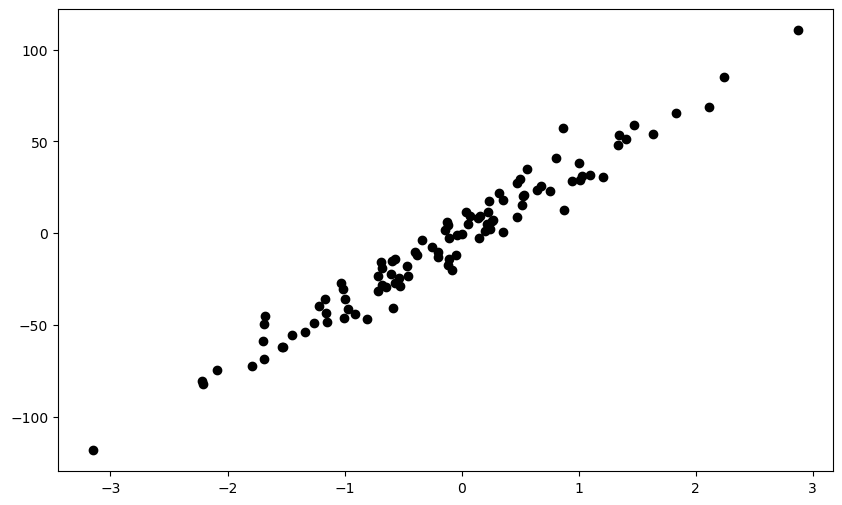

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.show()

In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [68]:
# Predict and evaluate
y_pred = dt_model.predict(X_test_scaled)

In [69]:
mean_squared_error(y_test, y_pred)

237.75839872838452

In [73]:
r2_score(y_test, y_pred)

0.8537229947477192

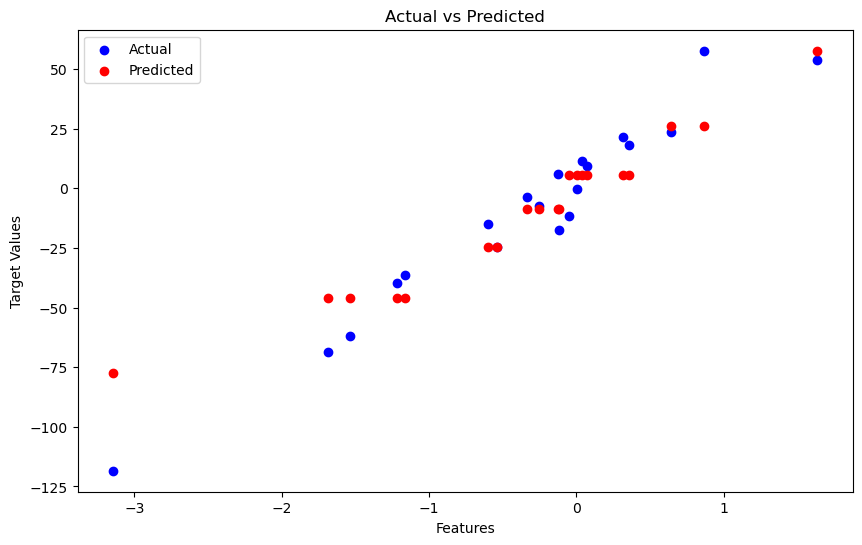

In [75]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Features')
plt.ylabel('Target Values')
plt.legend()
plt.show()

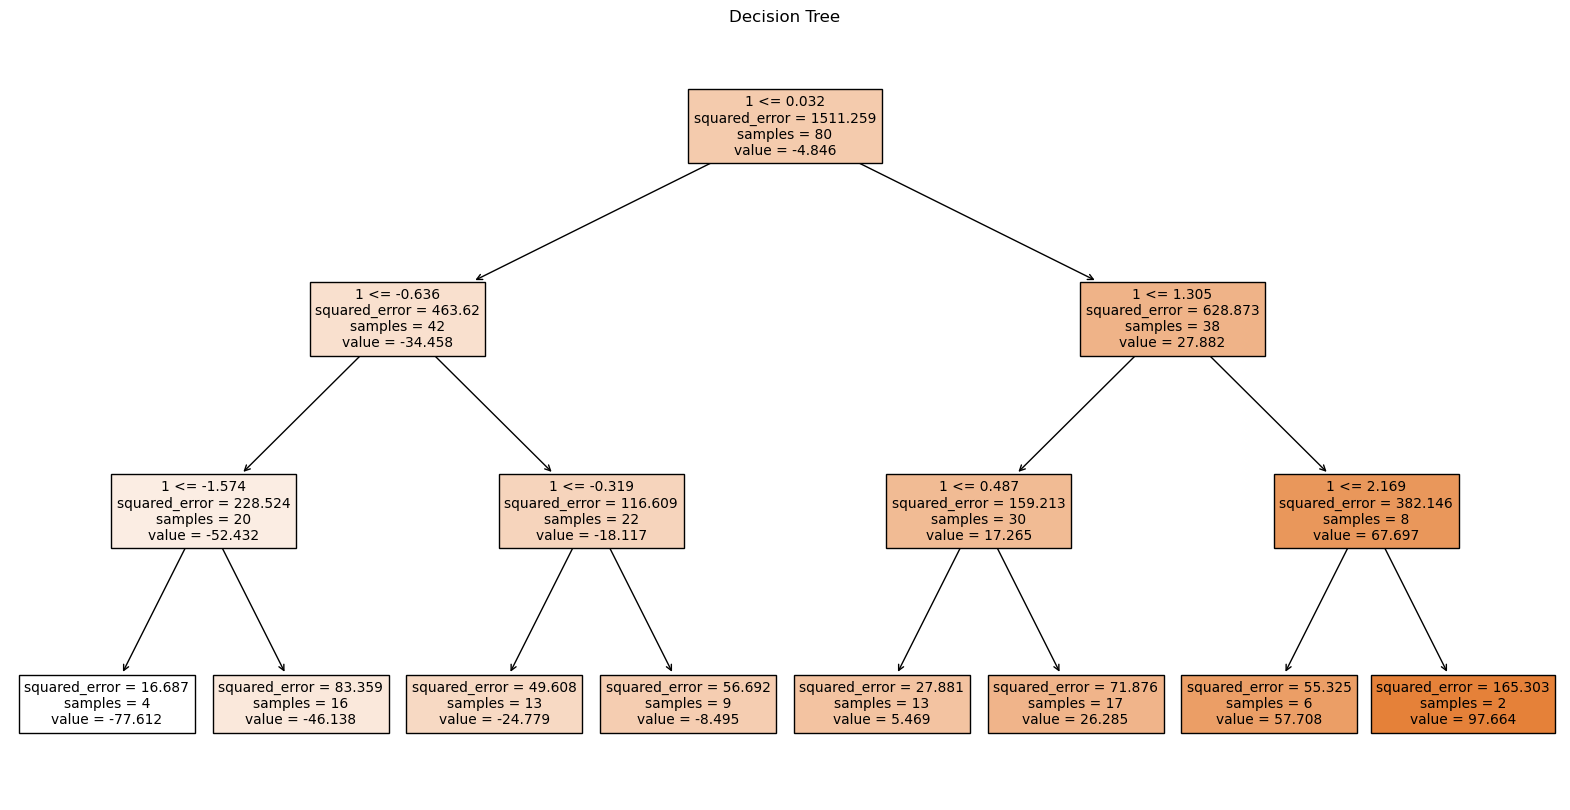

In [78]:
# Visualization of Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=["1"], filled=True)
plt.title('Decision Tree')
plt.show()